Mean Absolute Error: 9032359.906048952
Mean Squared Error: 1532914876900784.2
R-squared: 0.5706773596406127


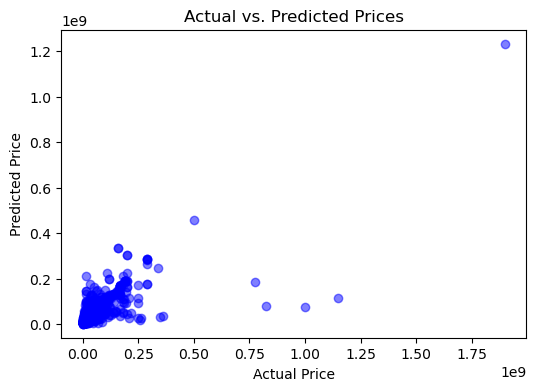

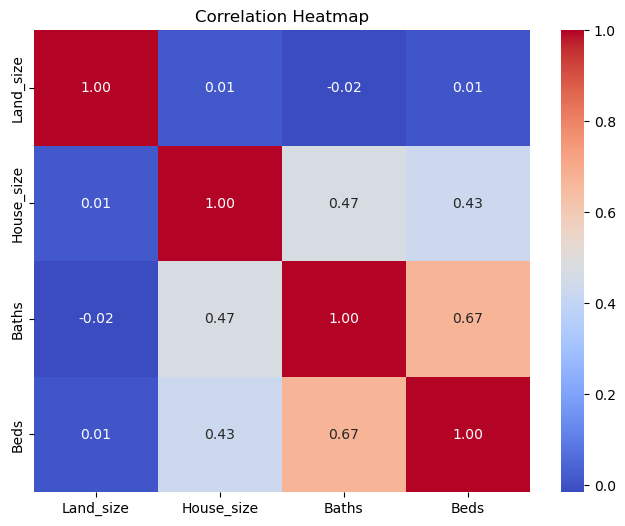

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


train = pd.read_csv('train_1.csv').ffill().drop("Id", axis=1)
test = pd.read_csv('test_1.csv').ffill().drop("Id", axis=1)

X = train[['Land_size', 'House_size', 'Baths', 'Beds']]
y = train['Sales_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


correlation_matrix = X_train.corr()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and R2 score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Scatter plot of Actual vs. Predicted Prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, model.predict(X_test), color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Feature Importance Plot
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance_sorted.values, y=feature_importance_sorted.index, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



# Flask app setup
app = Flask(__name__)

@app.route('/predict_price', methods=['POST'])
def predict_price():
    # Get input data from the request
    data = request.get_json()
    
    # Convert input data to DataFrame
    input_df = pd.DataFrame(data, index=[0])
    
    # Ensure correct feature order and filter the DataFrame to include only the required features
    input_features = ['Land_size', 'House_size', 'Baths', 'Beds']
    input_df = input_df[input_features]
    
    # Make predictions
    predicted_price = model.predict(input_df)
    
    # Return predicted price as JSON response
    return jsonify({'predicted_price': predicted_price[0]})

if __name__ == '__main__':
    app.run(host='127.0.0.1', port=8000)
